In [4]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [5]:
def plot_bars(groupby_f, cols, df, agg_f):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
    for col, ax in zip(cols, axes.flatten()):
        temp = df.groupby(groupby_f)[col].agg(agg_f).reset_index() 
        sns.barplot(x=groupby_f, y=col, data=temp, ax=ax)
    plt.show();

In [6]:
df = pd.read_excel('classification_case.xlsx',  sheet_name='classific_data', index_col=0)

# Exploratory data analysis

In [7]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8
client_id,,,,,,,,
1,8,3557.333333,6.000000,68.489754,79.901296,6,5959.920000,42.304261
2,5,19046.793754,6.666667,103.547196,9.186530,7,163662.266667,0.000000
3,3,1204.780421,0.666667,0.715220,4.637334,5,37436.670000,0.000000
4,3,4413.223754,0.666667,25.565524,100.000000,2,4410.333333,0.000000
5,2,1669.557088,0.333333,21.997435,100.000000,2,1666.666667,100.000000


In [8]:
df.describe()

,f1,f2,f3,f4,f5,f6,f7,f8
count,38040.000000,38040.000000,38040.000000,38040.000000,38040.000000,38040.000000,38040.000000,38040.000000
mean,3.785699,1810.410978,2.476095,9.340598,53.460713,4.689537,9670.809971,16.157004
std,2.369721,8549.622878,3.422023,60.371825,33.597747,1.855597,28707.222309,29.472355
min,1.000000,2.890421,0.333333,-850.600995,0.000290,2.000000,0.223333,0.000000
25%,2.000000,144.223754,0.666667,-2.401181,21.757287,3.000000,977.612500,0.000000
50%,3.000000,387.890421,1.333333,-0.295001,53.173011,4.000000,2789.128333,0.000000
75%,5.000000,1189.452921,3.000000,6.474528,86.342162,6.000000,7857.293333,19.907828
max,31.000000,559162.570421,103.000000,3393.505350,100.000000,16.000000,877269.496667,100.000000


In [9]:
print(df.shape)
print(df.isnull().sum())

(38040, 8)
f1    0
f2    0
f3    0
f4    0
f5    0
f6    0
f7    0
f8    0
dtype: int64


In [10]:
df.dtypes

f1      int64
f2    float64
f3    float64
f4    float64
f5    float64
f6      int64
f7    float64
f8    float64
dtype: object

29
15


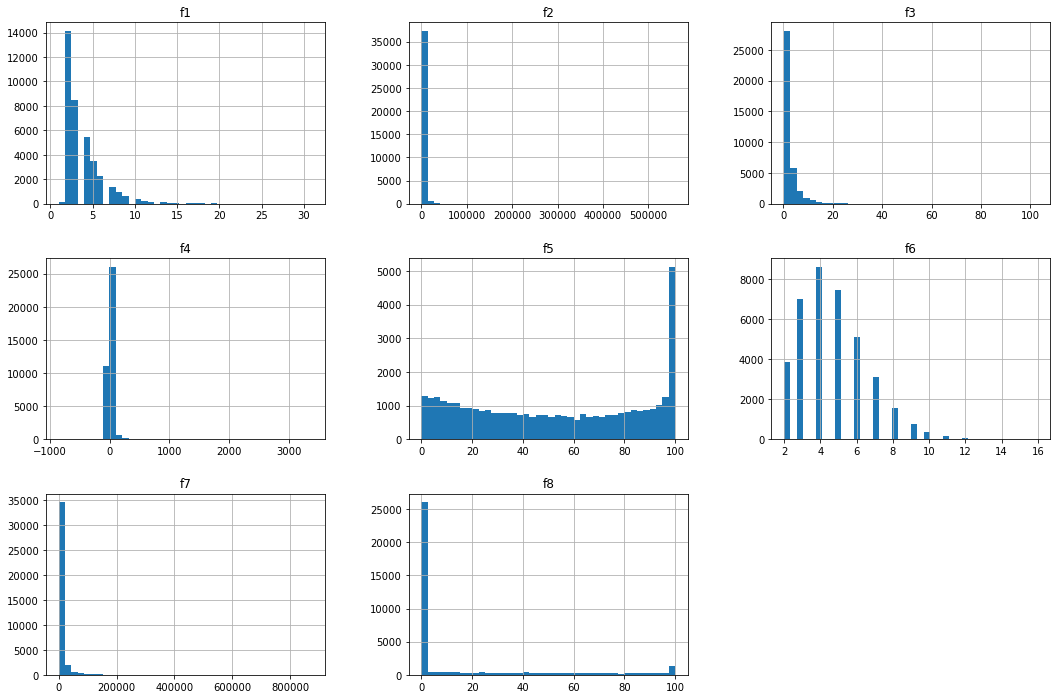

In [11]:
df.hist(figsize=(18,12), bins =40)
print(df.f1.nunique())
print(df.f6.nunique()) 

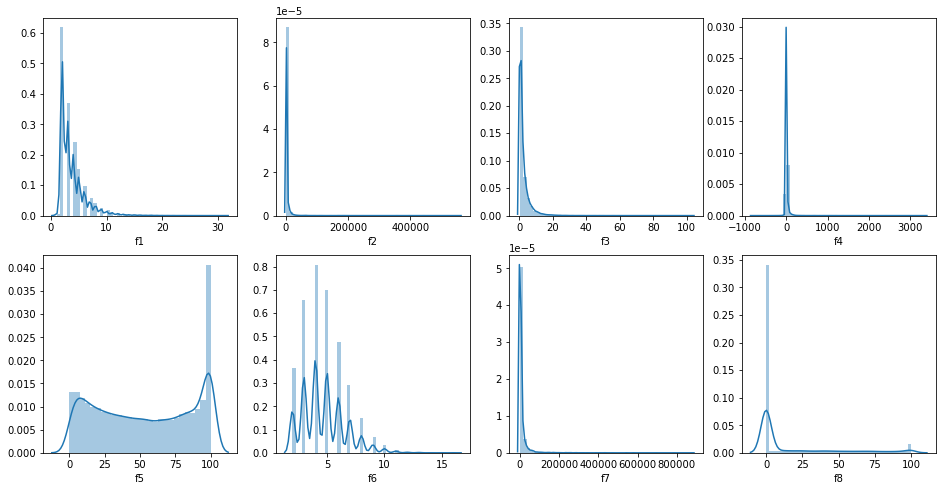

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

for i, ax in enumerate(axes.flatten()):
    sns.distplot(df.iloc[:, i], ax=ax, )

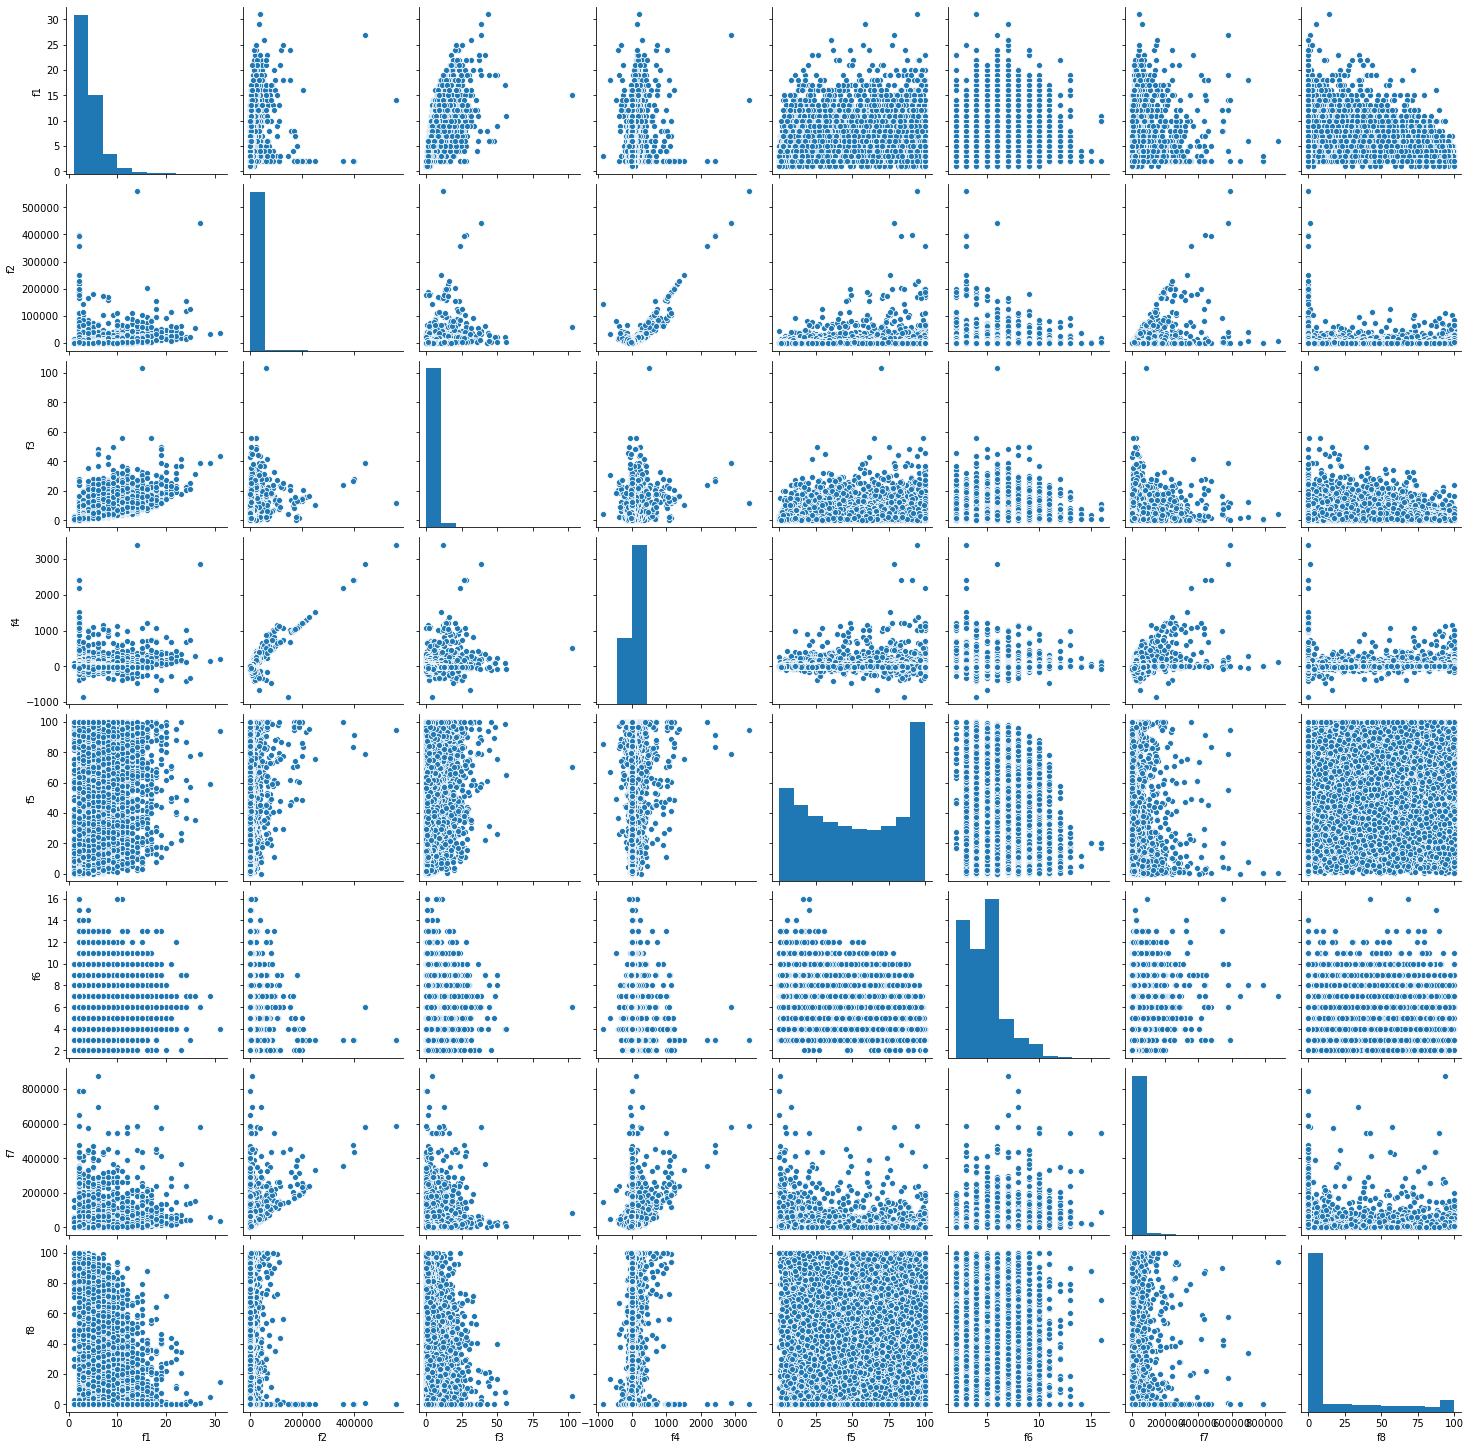

In [13]:
sns.pairplot(df)

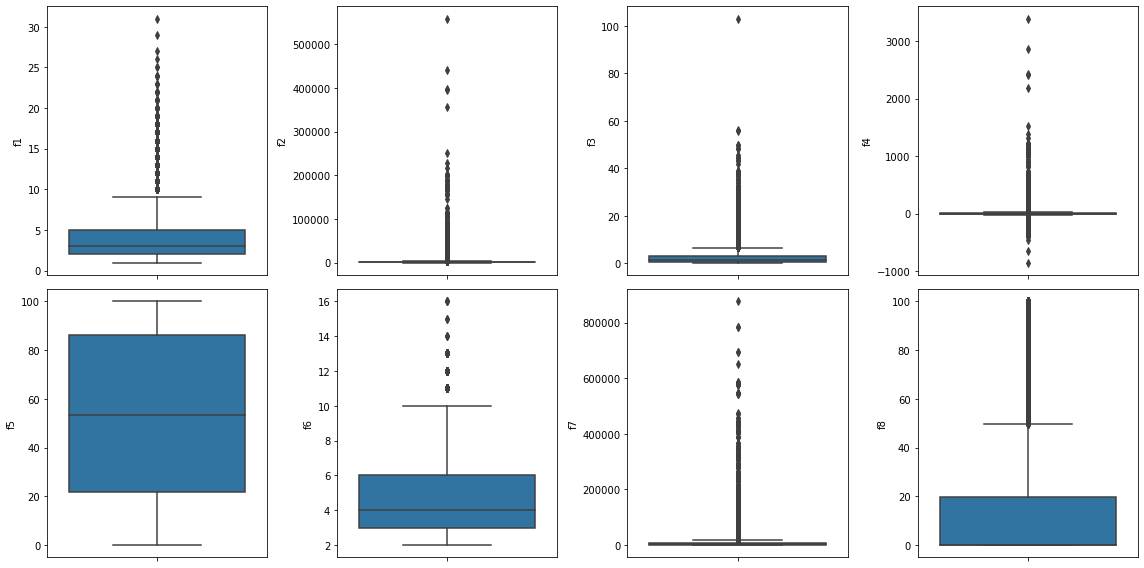

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(y= df.iloc[:, i], orient='v' , ax=ax)
fig.tight_layout();
plt.show()

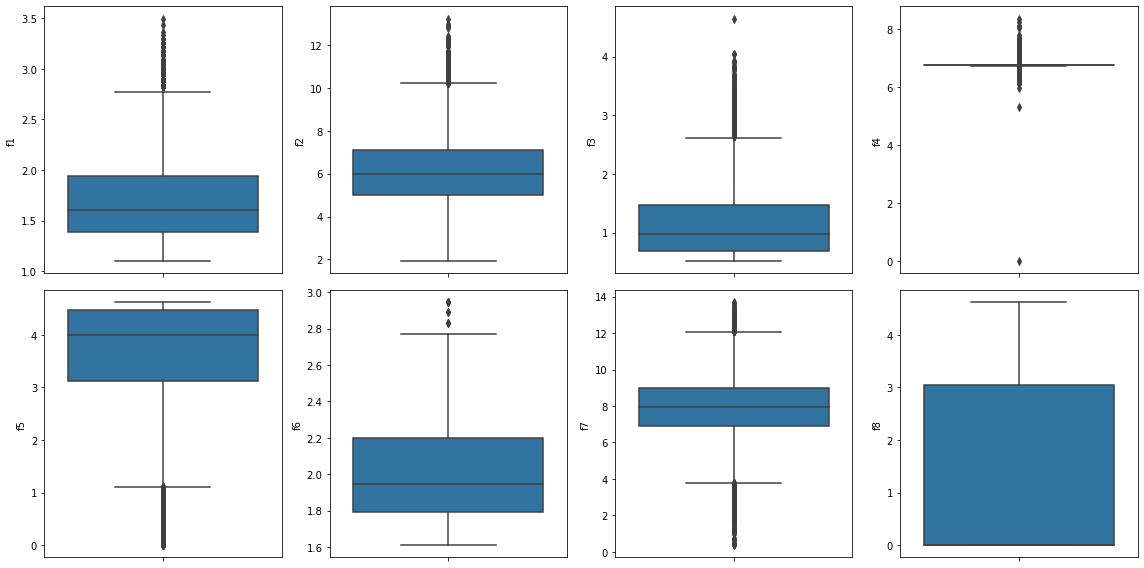

In [15]:
df1 = df.copy()
for col in df1.columns:
    df1[col] = df1[col] + abs(df1[col].min())
    df1[col] = np.log1p(df1[col] + 7e-11)
    
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(y= df1.iloc[:, i], orient='v' , ax=ax)
fig.tight_layout();
plt.show()

In [16]:
df[['f2', 'f3', 'f4', 'f5', 'f7', 'f8']].corr()

,f2,f3,f4,f5,f7,f8
f2,1.000000,0.362755,0.897123,0.061649,0.458083,0.045304
f3,0.362755,1.000000,0.295614,0.113235,0.238927,0.017295
f4,0.897123,0.295614,1.000000,0.042898,0.417678,0.159371
f5,0.061649,0.113235,0.042898,1.000000,-0.179893,0.023890
f7,0.458083,0.238927,0.417678,-0.179893,1.000000,0.073441
f8,0.045304,0.017295,0.159371,0.023890,0.073441,1.000000


In [17]:
df[df.f2 > np.percentile(df['f2'], 95)]

,f1,f2,f3,f4,f5,f6,f7,f8
client_id,,,,,,,,
2,5,19046.793754,6.666667,103.547196,9.186530,7,163662.266667,0.000000
9,5,180710.730421,3.000000,1097.003284,61.357960,9,388755.600000,0.000000
28,20,19366.550421,23.333333,83.024042,80.088082,6,24503.733333,1.682596
51,8,7842.647088,5.333333,87.939217,41.388385,8,21611.272357,76.780000
53,12,13010.720421,12.666667,151.857253,52.034884,7,29015.080000,54.603575
...,...,...,...,...,...,...,...,...
37469,8,17502.727088,9.333333,-127.930146,76.296495,7,95457.220000,0.000000
37502,14,8591.997088,12.000000,-183.079411,96.714992,7,12585.460000,0.000000
37550,3,7345.207088,7.000000,-122.570894,27.845654,8,32446.654827,96.721834


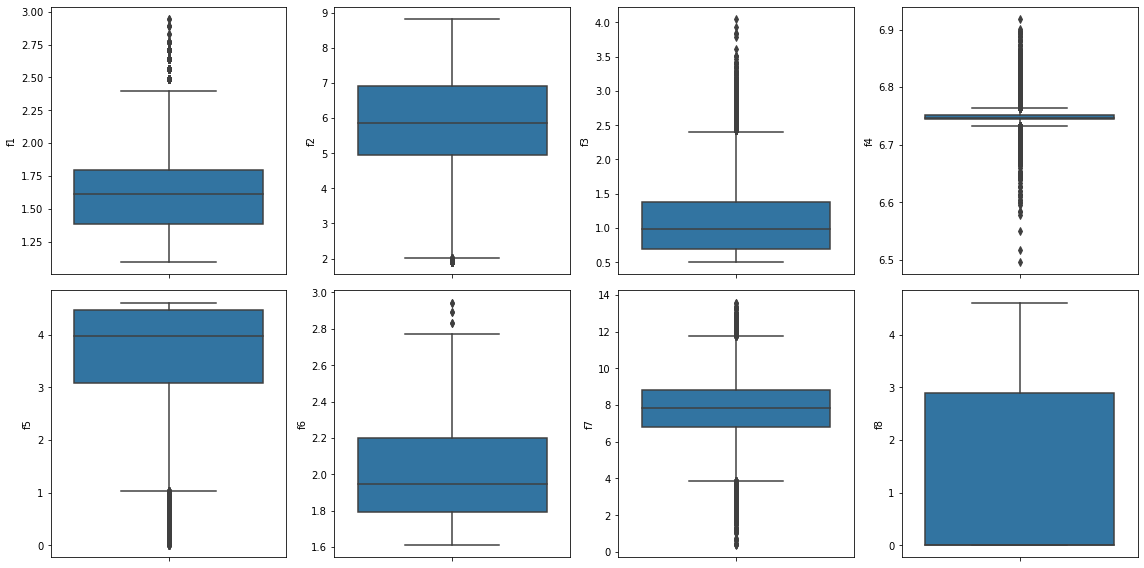

In [18]:
df1 = df1[df1.f2 < df1.f2.quantile(.95)]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(y= df1.iloc[:, i], orient='v' , ax=ax)
fig.tight_layout();
plt.show()

Предположение не подтвердилось, ограничение по выбросам одного признака не привело к улучшению ситуации с выбросами по остальным. Посмотрю, сколько данных я потеряю, если ограничу данные и снизу, и сверху по 95 перцентали. 

In [19]:
df2 = df1[(df1.f4 < df1.f4.quantile(.95)) & ((df1.f4 > df1.f4.quantile(.05)))]
df2.shape

(32524, 8)

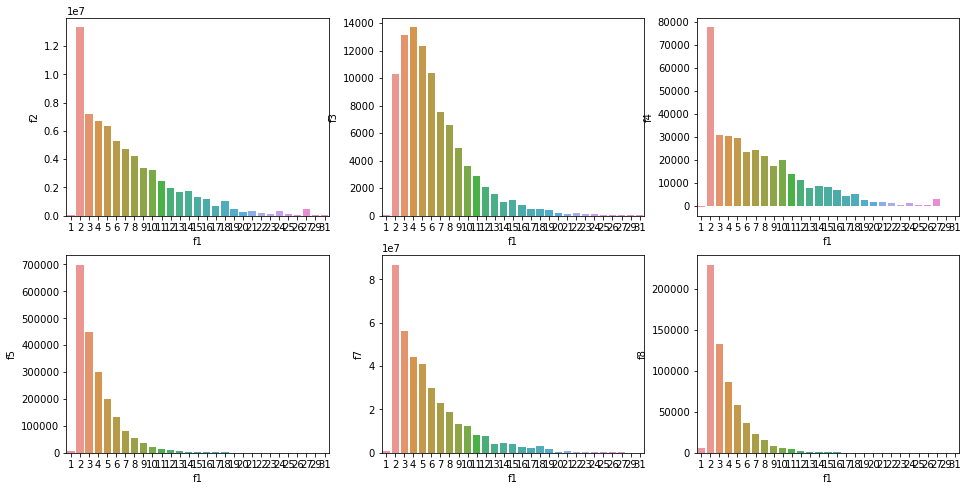

_ count _


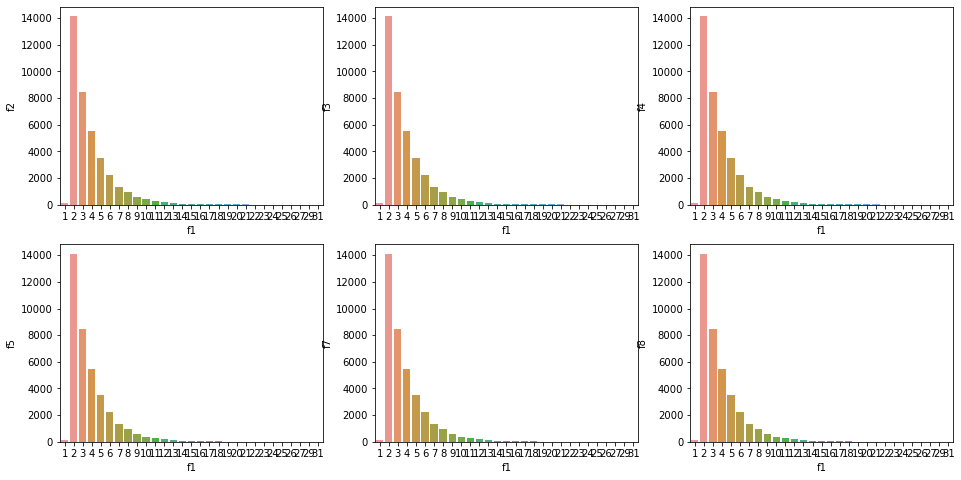

In [20]:
cols = ['f2', 'f3', 'f4', 'f5', 'f7', 'f8']
plot_bars('f1', cols, df, 'sum')
print('_ count _')
plot_bars('f1', cols, df, 'count')

In [21]:
df[df.f1>16]

,f1,f2,f3,f4,f5,f6,f7,f8
client_id,,,,,,,,
28,20,19366.550421,23.333333,83.024042,80.088082,6,24503.733333,1.682596
252,19,13528.717088,19.000000,53.685445,17.601832,13,84159.385767,0.000000
293,18,22592.717088,25.000000,141.228314,63.697046,7,40954.426667,4.727393
458,19,20820.927088,18.000000,90.745376,72.294906,8,31193.248720,0.000000
500,31,38072.010421,43.333333,203.762212,94.220816,4,39221.220000,14.363769
...,...,...,...,...,...,...,...,...
19921,18,10251.353754,22.333333,-284.115171,28.298362,5,44048.273333,13.028789
21504,25,22968.043754,21.333333,-313.719540,57.280638,3,44476.320000,2.334949
22911,19,23376.527088,24.666667,-388.904941,97.023299,4,38756.852133,46.202579


In [22]:
df['f1'] = df['f1'].apply(lambda x: 16 if x > 16 else x)

In [23]:
df

,f1,f2,f3,f4,f5,f6,f7,f8
client_id,,,,,,,,
1,8,3557.333333,6.000000,68.489754,79.901296,6,5959.920000,42.304261
2,5,19046.793754,6.666667,103.547196,9.186530,7,163662.266667,0.000000
3,3,1204.780421,0.666667,0.715220,4.637334,5,37436.670000,0.000000
4,3,4413.223754,0.666667,25.565524,100.000000,2,4410.333333,0.000000
5,2,1669.557088,0.333333,21.997435,100.000000,2,1666.666667,100.000000
...,...,...,...,...,...,...,...,...
38188,2,432.100421,0.333333,-8.118225,56.533765,4,759.210000,0.000000
38189,5,1193.170421,5.000000,-77.019736,91.789573,3,1200.307001,3.816189
38190,6,4832.393754,1.666667,-8.216552,51.029172,8,12186.166667,17.819731


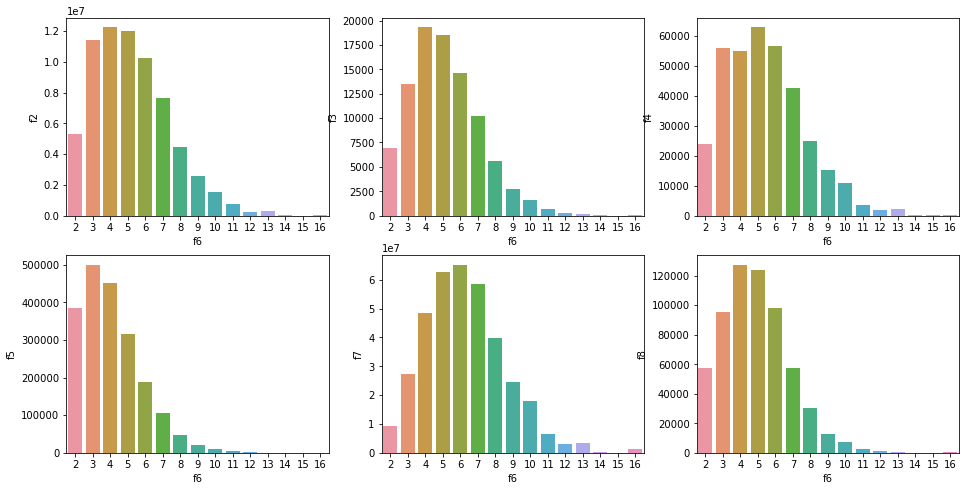

_ count _


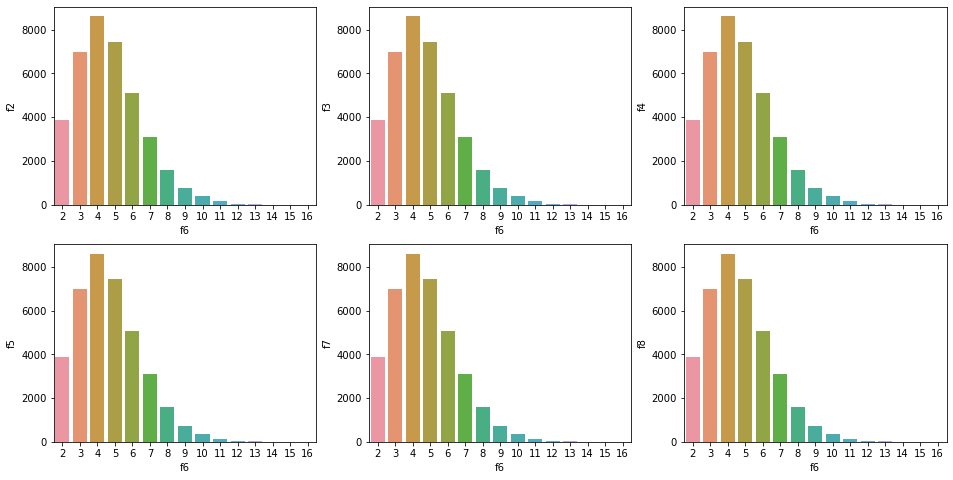

In [24]:
cols = ['f2', 'f3', 'f4', 'f5', 'f7', 'f8']
plot_bars('f6', cols, df, 'sum')
print('_ count _')
plot_bars('f6', cols, df, 'count')

In [25]:
df[df.f6>11]

,f1,f2,f3,f4,f5,f6,f7,f8
client_id,,,,,,,,
21,2,172.890421,0.666667,0.367084,15.354205,12,3333.788140,0.000000
85,2,517.223754,0.333333,2.456793,28.994639,12,3471.768280,0.000000
140,3,1136.223754,0.666667,5.590399,24.760271,12,5537.096203,0.000000
252,16,13528.717088,19.000000,53.685445,17.601832,13,84159.385767,0.000000
760,13,10063.593754,21.000000,73.748456,18.855388,12,65816.591467,18.589094
...,...,...,...,...,...,...,...,...
35911,6,833.557088,2.000000,-6.296547,33.560444,12,56001.354133,0.000000
36298,2,89.523754,0.333333,-0.132363,20.328784,13,325252.426667,75.521289
37036,3,184.000421,1.000000,-8.075790,5.268040,14,24638.640000,0.000000


In [26]:
df['f6'] = df['f6'].apply(lambda x: 11 if x > 11 else x)

# Предобработка данных и построение моделей кластеризации

Для оценки работы модели будем использовать коэффициент силуэта и Davies-Bouldin index. Коэффициент силуэта равен -1 для плохой кластеризации и +1 для очень плотной кластеризации с хорошо разделенными кластерами. Коэффициент около нуля указывает на перекрывающиеся кластеры.
Davies-Bouldin index обозначает среднее «сходство» между кластерами, где сходство является мерой, которая сравнивает расстояние между кластерами с размером самих кластеров. Ноль - это минимально возможная оценка. Значения ближе к нулю указывают на лучшее разделение.

### Общий пайплайн обучения модели:
    1.1 Выбор фичей для моделирования
    1.2 Логарифмирование
    1.3 Нормализация данных
    1.4 Нахождение оптимального количества кластреров с помощью elbow метода
    1.5 Обучение модели кластеризации K-means
    1.6 Подсчет метрик качества
    1.7 Визуализация

#### На основе пайплайна проведем серию эксперементов, чтобы построить оптимальную модель. 

1.1 В предположении, что номинативные переменные f1 и f6 являются числовыми, т.е. допустимо сравнение между различными значениями признака, построим первую модель с использованием этих переменных. 

В предположении, что переменные f1 и f6 являются категориальными и сравнение между различными значениями признака недопустимо, построим вторую модель без использования этих переменных. 
Имея дело с классификацией, можно было бы воспользоваться OneHotEncoding, но в кластеризации это было бы неправильно. В целом, для категориальных данных пространство дискретно, Евклидова функция расстояния в таком пространстве вызывает вопросы. Как и нахождение средего между, например, значением признака "Москва" и "Новосибирск".

Также попробуем осуществить нормализацию разными методами -  StandardScaler и MinmaxScaler, сравним результаты 

#### Модель 1 со всеми признаками и нормализацией StandardScaler
1.2 Логарифмирование. Для логарифмирования важно, чтобы все числа были положительными. 

In [27]:
df_log = df.copy()
df_log['f2'] = df_log['f2'] + abs(df_log['f2'].min())
df_log['f7'] = df_log['f7'] + abs(df_log['f7'].min())
df_log['f2'] = np.log(df_log.f2)
df_log['f7'] = np.log(df_log.f7)

1.3 Нормализация данных с помощью StandardScaler

In [28]:
std_scaler = StandardScaler()
X_log_scaled = std_scaler.fit_transform(df_log)

1.4 Подберем число кластеров при помощи метода "локтя". Т.к. мы будем делать это неоднократно, чтобы упростить себе задачу, 
сделаем это с помощью функции

In [29]:
def elbow_method(X):
    sum_of_squared_distances = []
    k_values = range(1,15)
    for k in k_values:
        km = KMeans(n_clusters=k, random_state=17)
        km = km.fit(X)
        sum_of_squared_distances.append(km.inertia_)
    
    plt.plot(k_values, sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

In [30]:
def clusterig_visualization(model, X):
    pca = PCA(n_components=2)
    res = pca.fit_transform(X)
    plt.figure(figsize=(12,8))
    plt.scatter(res[:,0], res[:,1], c=model.labels_, s=50, cmap='viridis')
    plt.title('PCA')

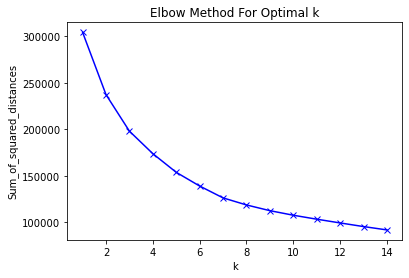

In [31]:
elbow_method(X_log_scaled)

1.5 Обучим модель с оптимальным числом кластеров, взятых из графика выше и визуализируем кластеризацию при помощи PCA

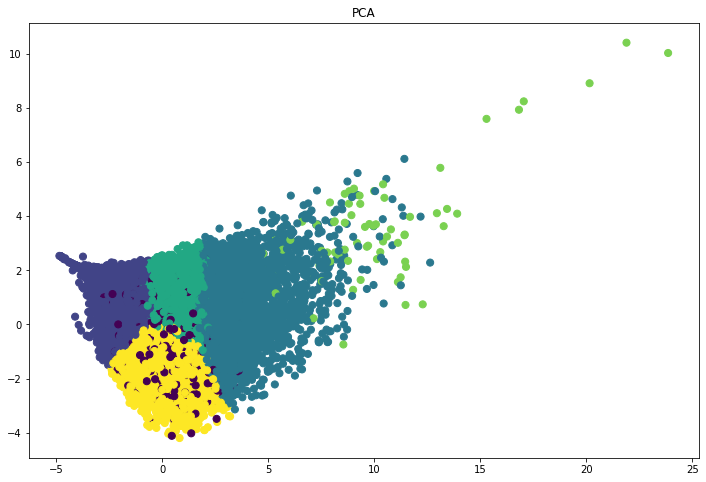

In [32]:
kmeans = KMeans(n_clusters=6, random_state=17)
kmeans.fit(X_log_scaled)

clusterig_visualization(kmeans, X_log_scaled)

1.6 Оценим качество модели

In [33]:
print('Силуэт модели, обученной на всех фичах с предобработкой данных вида log+standard_scaler и 6 кластерами: %0.3f'
      % metrics.silhouette_score(X_log_scaled, kmeans.labels_))
print('Davies-Bouldin index для этой модели: %0.3f'
      %metrics.davies_bouldin_score(X_log_scaled, kmeans.labels_))

Силуэт модели, обученной на всех фичах с предобработкой данных вида log+standard_scaler и 6 кластерами: 0.218
Davies-Bouldin index для этой модели: 1.192


In [34]:
pd.Series(kmeans.labels_).value_counts()

5    11902
1     9351
3     7992
0     5206
2     3507
4       82
dtype: int64

In [35]:
X_log_scaled_5 = X_log_scaled[kmeans.labels_ != 4]

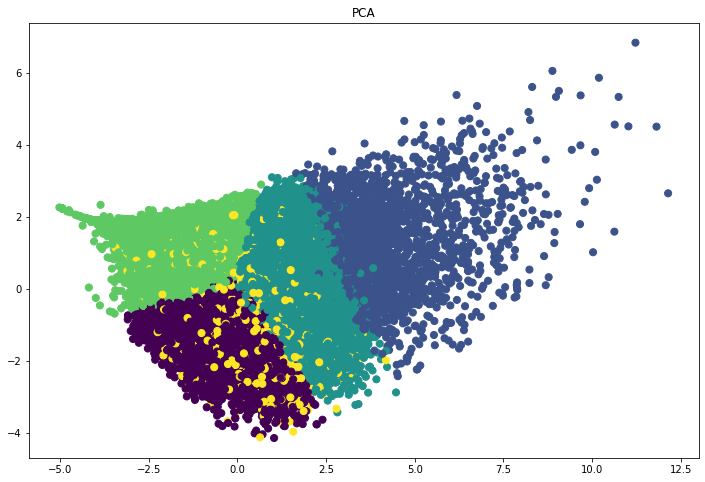

In [36]:
kmeans_5 = KMeans(n_clusters=5, random_state=17)
kmeans_5.fit(X_log_scaled_5)

clusterig_visualization(kmeans_5, X_log_scaled_5)

In [37]:
print('Davies-Bouldin index для этой модели: %0.3f'
      %metrics.davies_bouldin_score(X_log_scaled_5, kmeans_5.labels_))

Davies-Bouldin index для этой модели: 1.342


In [38]:
print('Силуэт модели, обученной на всех фичах с предобработкой данных вида log+standard_scaler и 6 кластерами: %0.3f'
      % metrics.silhouette_score(X_log_scaled_5, kmeans_5.labels_))

Силуэт модели, обученной на всех фичах с предобработкой данных вида log+standard_scaler и 6 кластерами: 0.234


#### Модель 2 со всеми признаками и нормализацией MinMaxScaler
1.3 Нормализация данных

In [39]:
min_max_scaler = MinMaxScaler()
X_min_max_scaled = min_max_scaler.fit_transform(df)

1.4 Нахождение оптимального количества кластреров с помощью elbow метода

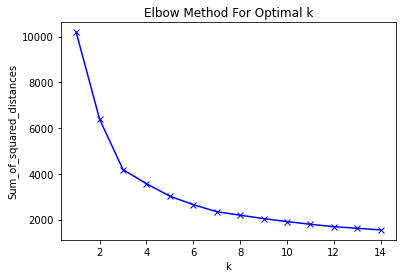

In [40]:
elbow_method(X_min_max_scaled)

1.5 Обучение модели кластеризации K-means с 3 кластерами

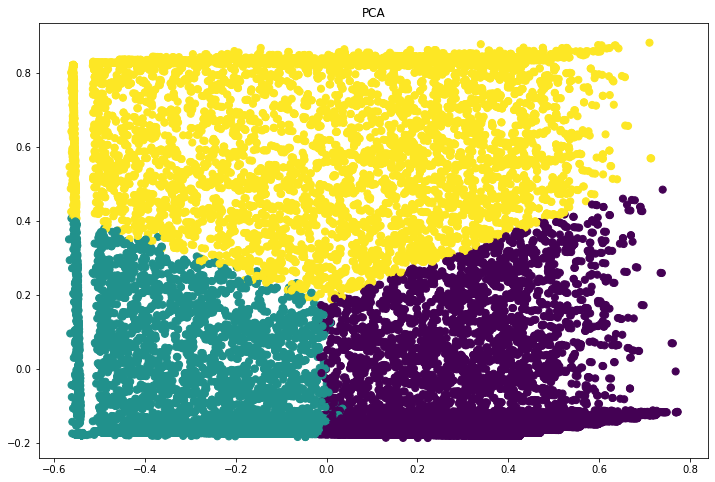

In [41]:
k_means = KMeans(n_clusters=3, random_state=17)
k_means.fit(X_min_max_scaled)
clusterig_visualization(k_means, X_min_max_scaled)

1.6 Оценка качества модели 2

In [42]:
print('Силуэт модели 2, обученной на всех фичах с предобработкой данных вида min_max_scaler и 3 кластерами: %0.3f'
      % metrics.silhouette_score(X_min_max_scaled, k_means.labels_))
print('Davies-Bouldin index для этой модели: %0.3f'
      %metrics.davies_bouldin_score(X_min_max_scaled, k_means.labels_))

Силуэт модели 2, обученной на всех фичах с предобработкой данных вида min_max_scaler и 3 кластерами: 0.419
Davies-Bouldin index для этой модели: 0.883


#### Лучших значений метрик достигает модель с предобработкой вида min_max_scaler. Дальше будем работать с ней.

#### Модель 3 без номинативных переменных f1 и f6 с предобработкой MinMaxScaler

In [43]:
df_wo_categ = df.copy()
df_wo_categ = df_wo_categ.drop(['f1', 'f6'], axis=1)

1.3 Нормализация данных

In [44]:
X_wo_categ_min_max_scaled = min_max_scaler.fit_transform(df_wo_categ)

1.4 Поиск оптимального числа кластеров

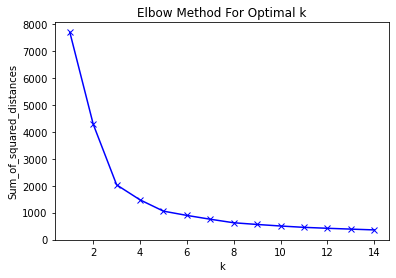

In [45]:
elbow_method(X_wo_categ_min_max_scaled)

1.5 Обучение модели №3 с 3 кластерами и визуализация результата

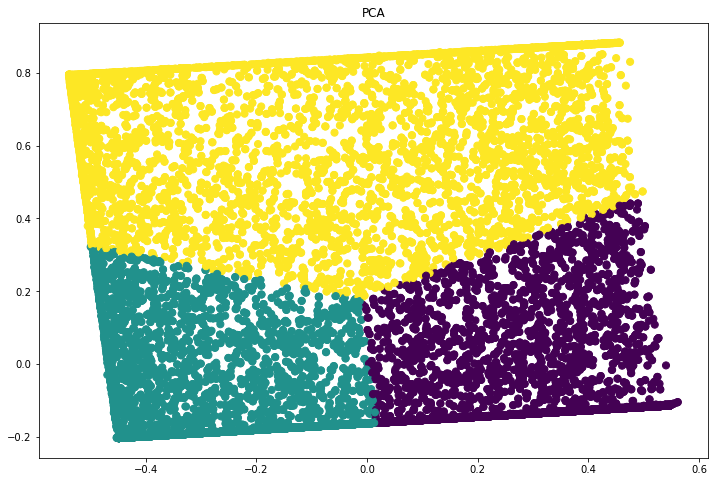

In [46]:
kms = KMeans(n_clusters=3, random_state=17)
kms.fit(X_wo_categ_min_max_scaled)
clusterig_visualization(kms, X_wo_categ_min_max_scaled)

1.6 Оценка качества модели №3

In [47]:
print('Силуэт модели №3 без номинативных переменных с предобработкой данных вида min_max_scaler и 3 кластерами: %0.3f'
      % metrics.silhouette_score(X_wo_categ_min_max_scaled, kms.labels_))
print('Davies-Bouldin index для этой модели: %0.3f'
      %metrics.davies_bouldin_score(X_wo_categ_min_max_scaled, kms.labels_))

Силуэт модели №3 без номинативных переменных с предобработкой данных вида min_max_scaler и 3 кластерами: 0.554
Davies-Bouldin index для этой модели: 0.662


In [48]:
from sklearn.model_selection import train_test_split
data1, data2 = train_test_split(df_wo_categ, random_state=42, test_size=0.3)

In [49]:
data1_scaled = min_max_scaler.fit_transform(data1)
data2_scaled = min_max_scaler.transform(data2)

In [50]:
k_ms = KMeans(n_clusters=3, random_state=42)
k_ms.fit(data1_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [51]:
print('Davies-Bouldin index для этой модели: %0.3f'
      %metrics.davies_bouldin_score(data1_scaled, k_ms.labels_))

Davies-Bouldin index для этой модели: 0.669


In [52]:
k_ms.fit(data2_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [53]:
print('Davies-Bouldin index для этой модели: %0.3f'
      %metrics.davies_bouldin_score(data2_scaled, k_ms.labels_))

Davies-Bouldin index для этой модели: 0.650


Считаю, что работу модели можно оценить как стабильную, я не только разбила выборку, но и изменила инициализацию центроидов, указав другой random_state, а изменения в метрике качества составляют сотые доли.

Дополнительно улучшать качество модели или ее стабильность я бы попробовала следующими способами:
1) узнать бизнес смысл фичей. Что они значат, как собираются, понять насколько они полезны и качественны
2) посмотреть другие релевантные фичи, на которых можно делать кластеризацию. 
3) протестировать модель на бОльшем количестве клиентов